In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']

data = np.zeros((1, len(columns)))

for file in ['../UCI_data/processed.va.csv', '../UCI_data/processed.switzerland.csv', 
             '../UCI_data/processed.cleveland.csv', '../UCI_data/processed.hungarian.csv']:
    data = np.vstack((data, np.genfromtxt(file, delimiter=',')))
data = data[1:]
df = pd.DataFrame(data=data, columns=columns, index=None)

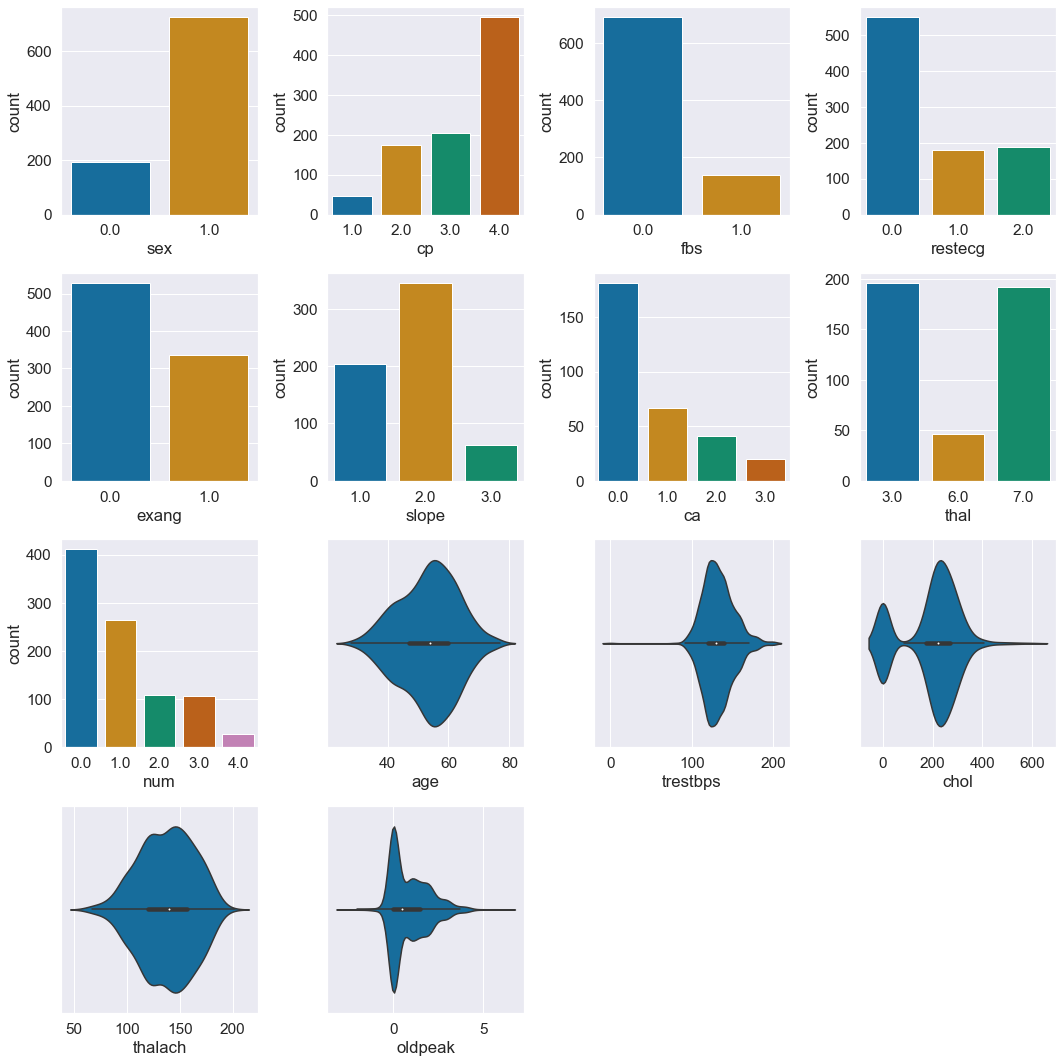

In [17]:
plotting_dict = dict()
plotting_dict['discrete'] = ['sex', 'cp', 'fbs', 'restecg', 'exang', 
                             'slope', 'ca', 'thal', 'num']
plotting_dict['continuous'] = ['age', 'trestbps', 'chol', 'thalach', 
                               'oldpeak']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
sns.set(font_scale=1.2)

x = 0
y = 0

for plot_type in plotting_dict.keys():
    for feature in plotting_dict[plot_type]:
        if y == 4:
            y = 0
            x += 1

        if plot_type == 'discrete':
            sns.countplot(df[~df[feature].isna()][feature], 
                          ax=axes[x, y], palette='colorblind')
        elif plot_type == 'continuous':
            sns.violinplot(x=df[~df[feature].isna()][feature], 
                           ax=axes[x, y], palette='colorblind')
        
        y += 1

fig.delaxes(axes[3, 2])
fig.delaxes(axes[3, 3])

fig.tight_layout()
plt.show()

In [5]:
from IPython.display import display, HTML

CSS = """
div.cell:nth-child(5) .output {
    flex-direction: row;
    justify-content: start;
}
div.cell:nth-child(6) .output {
    flex-direction: row;
    justify-content: start;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [6]:
quantile_df = pd.DataFrame(index=df.columns)
for quantile in [0, .25, .50, .75, 1]:
    quantile_df[f'{quantile:2.0%}'] = df.quantile(q=quantile)
display(quantile_df.iloc[:7, :], quantile_df.iloc[7:, :])

,0%,25%,50%,75%,100%
age,28.0,47.0,54.0,60.0,77.0
sex,0.0,1.0,1.0,1.0,1.0
cp,1.0,3.0,4.0,4.0,4.0
trestbps,0.0,120.0,130.0,140.0,200.0
chol,0.0,175.0,223.0,268.0,603.0
fbs,0.0,0.0,0.0,0.0,1.0
restecg,0.0,0.0,0.0,1.0,2.0


,0%,25%,50%,75%,100%
thalach,60.0,120.0,140.0,157.0,202.0
exang,0.0,0.0,0.0,1.0,1.0
oldpeak,-2.6,0.0,0.5,1.5,6.2
slope,1.0,1.0,2.0,2.0,3.0
ca,0.0,0.0,0.0,1.0,3.0
thal,3.0,3.0,6.0,7.0,7.0
num,0.0,0.0,1.0,2.0,4.0


In [7]:
other_info = pd.concat([df.mean(), df.std()], 
                  keys=['Mean', 'Std. Deviation'], axis=1)
display(other_info.iloc[:7, :], other_info.iloc[7:, :])

,Mean,Std. Deviation
age,53.510870,9.424685
sex,0.789130,0.408148
cp,3.250000,0.930969
trestbps,132.132404,19.066070
chol,199.130337,110.780810
fbs,0.166265,0.372543
restecg,0.604575,0.805827


,Mean,Std. Deviation
thalach,137.545665,25.926276
exang,0.389595,0.487941
oldpeak,0.878788,1.091226
slope,1.770867,0.619256
ca,0.676375,0.935653
thal,5.087558,1.919075
num,0.995652,1.142693


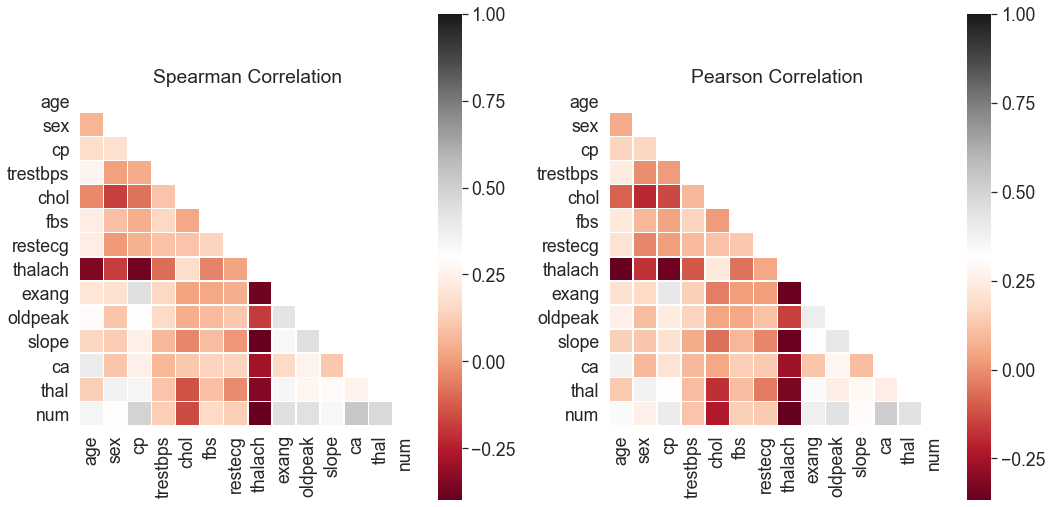

In [15]:
spear_corr = df.corr(method='spearman')
spear_mask = np.zeros_like(spear_corr.values)
spear_mask[np.triu_indices_from(spear_mask)] = True

pear_corr = df.corr(method='pearson')
pear_mask = np.zeros_like(pear_corr.values)
pear_mask[np.triu_indices_from(pear_mask)] = True

sns.set(font_scale=1.6)
plt.figure(figsize=(15,15))

with sns.axes_style("white"):
    ax1=plt.subplot(221)
    sns.heatmap(spear_corr, mask=spear_mask, square=True, linewidths=.5, 
                cmap="RdGy", ax=ax1)
    ax1.set_ylim(ax1.get_ylim()[0] + 0.5, ax1.get_ylim()[1] - 0.5)
    ax1.set_title('Spearman Correlation')
    
    ax2=plt.subplot(222)
    sns.heatmap(pear_corr, mask=pear_mask, square=True, linewidths=.5, 
                cmap="RdGy", ax=ax2)
    ax2.set_ylim(ax2.get_ylim()[0] + 0.5, ax2.get_ylim()[1] - 0.5)
    ax2.set_title('Pearson Correlation')

plt.tight_layout()
plt.show()